TensorFlow version: 2.19.0
Loading Keras model...
✅ Keras model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,086,292 (34.66 MB)

 Trainable params: 3,016,198 (11.51 MB)

 Non-trainable params: 37,696 (147.25 KB)

 Optimizer params: 6,032,398 (23.01 MB)


Analyzing image quality: document_dataset/Test/Newspaper/np (2508).jpg
Image shape: (1600, 1200, 3)
Image dtype: uint8
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 146.07
Standard deviation: 57.01
Contrast: 57.01
Brightness: 146.07
Sharpness: 3496.53
Entropy: 7.44
Blurriness (Laplacian variance): 3496.53


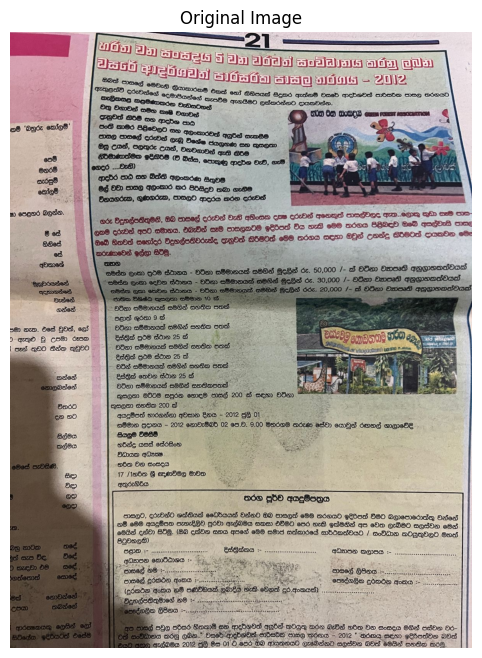


Making prediction with original image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: newspaper with 99.65% confidence
All probabilities: {'exam': 0.0016795535339042544, 'form': 0.0010828371159732342, 'newspaper': 0.996469259262085, 'note': 2.9571390314231394e-07, 'story': 0.0007673371001146734, 'word': 7.442369565069384e-07}

Testing with multiple images from different classes

Testing exam image: exam (22).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: form with 61.57% confidence


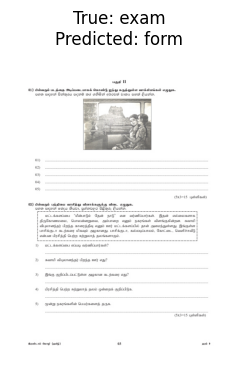


Testing form image: form (6).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted: form with 98.51% confidence


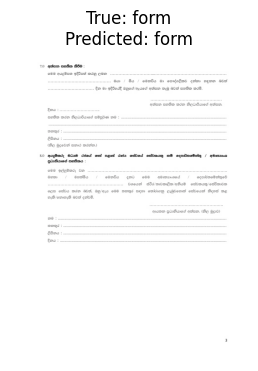


Testing newspaper image: np (2508).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: newspaper with 99.65% confidence


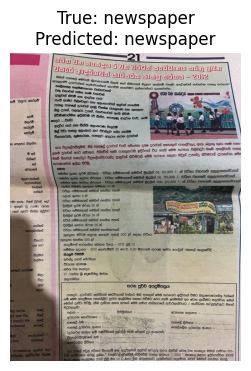


Testing note image: sentence_0019.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted: note with 100.00% confidence


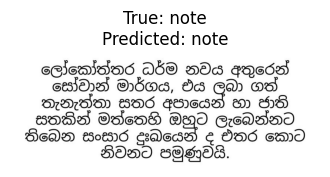


Testing story image: story (19).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: story with 98.96% confidence


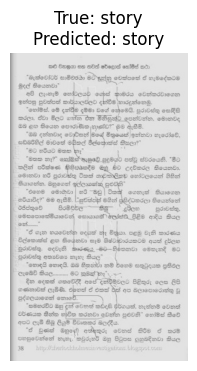


Testing word image: word (9).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted: word with 100.00% confidence


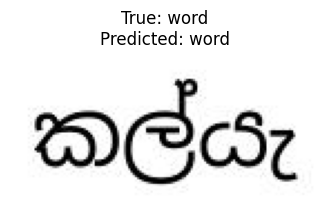

In [20]:
# Document Classification with Keras Model
# This notebook uses the original Keras model for prediction and analyzes image quality

import tensorflow as tf
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import os
import time
import cv2

# Set up the environment
print("TensorFlow version:", tf.__version__)

# ===============================
# Configuration
# ===============================
# Path to your Keras model
KERAS_MODEL_PATH = "best_document_classifier_model.keras"

# Class names (update these to match your training classes)
CLASS_NAMES = ['exam', 'form', 'newspaper', 'note', 'story', 'word']  # Replace with your actual class names

# Image settings (should match your training configuration)
IMAGE_SIZE = (224, 224)  # Update if you used a different size

# Test image path
IMAGE_PATH = "document_dataset/Test/Newspaper/np (2508).jpg"

# ===============================
# Load Keras Model
# ===============================
def load_keras_model(model_path):
    """Load the Keras model"""
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Keras model file not found: {model_path}")
    
    print("Loading Keras model...")
    model = tf.keras.models.load_model(model_path)
    print("✅ Keras model loaded successfully!")
    
    # Display model summary
    model.summary()
    
    return model

# Load the model
model = load_keras_model(KERAS_MODEL_PATH)

# ===============================
# Image Quality Analysis Functions
# ===============================
def analyze_image_quality(image_path):
    """Analyze various quality metrics of an image"""
    print(f"\nAnalyzing image quality: {image_path}")
    
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)
    
    # Calculate basic statistics
    print(f"Image shape: {image_array.shape}")
    print(f"Image dtype: {image_array.dtype}")
    print(f"Min pixel value: {image_array.min()}")
    print(f"Max pixel value: {image_array.max()}")
    print(f"Mean pixel value: {image_array.mean():.2f}")
    print(f"Standard deviation: {image_array.std():.2f}")
    
    # Calculate contrast
    contrast = image_array.std()
    print(f"Contrast: {contrast:.2f}")
    
    # Calculate brightness
    brightness = image_array.mean()
    print(f"Brightness: {brightness:.2f}")
    
    # Check if image is too dark or too bright
    if brightness < 50:
        print("⚠️ Warning: Image might be too dark")
    elif brightness > 200:
        print("⚠️ Warning: Image might be too bright")
    
    # Calculate sharpness (using Laplacian variance)
    gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    print(f"Sharpness: {sharpness:.2f}")
    
    if sharpness < 100:
        print("⚠️ Warning: Image might be blurry")
    
    # Calculate entropy (measure of information content)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    entropy = -np.sum(hist * np.log2(hist + 1e-7))
    print(f"Entropy: {entropy:.2f}")
    
    # Calculate blurriness using variance of Laplacian
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()
    print(f"Blurriness (Laplacian variance): {fm:.2f}")
    
    # Check for blurriness
    if fm < 100:
        print("⚠️ Warning: Image might be blurry (Laplacian variance)")
    
    return image_array, {
        'contrast': contrast,
        'brightness': brightness,
        'sharpness': sharpness,
        'entropy': entropy,
        'blurriness': fm
    }

def enhance_image(image_array, enhancement_type="contrast", factor=1.5):
    """Apply various enhancements to an image"""
    image = Image.fromarray(image_array)
    
    if enhancement_type == "contrast":
        enhancer = ImageEnhance.Contrast(image)
    elif enhancement_type == "brightness":
        enhancer = ImageEnhance.Brightness(image)
    elif enhancement_type == "sharpness":
        enhancer = ImageEnhance.Sharpness(image)
    else:
        return image_array
    
    enhanced_image = enhancer.enhance(factor)
    return np.array(enhanced_image)

def display_images(original, enhanced, title1="Original", title2="Enhanced"):
    """Display original and enhanced images side by side"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(original)
    ax1.set_title(title1)
    ax1.axis('off')
    
    ax2.imshow(enhanced)
    ax2.set_title(title2)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# ===============================
# Image Preprocessing
# ===============================
def preprocess_image(image_array):
    """Preprocess image for the model"""
    # Resize to match model input
    image = Image.fromarray(image_array).resize(IMAGE_SIZE)
    
    # Convert to numpy array
    image_array = np.array(image, dtype=np.float32)
    
    # Normalize to 0-1
    image_array = image_array / 255.0
    
    # Add batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    
    return image_array

# ===============================
# Prediction with Keras Model
# ===============================
def predict_with_keras(model, image_array):
    """Make prediction using the Keras model"""
    # Make prediction
    prediction = model.predict(image_array)
    
    # Get the predicted class
    predicted_class_idx = np.argmax(prediction[0])
    predicted_class = CLASS_NAMES[predicted_class_idx]
    confidence = prediction[0][predicted_class_idx]
    
    # Create results dictionary
    results = {
        'predicted_class': predicted_class,
        'confidence': confidence,
        'all_probabilities': {CLASS_NAMES[i]: float(prob) for i, prob in enumerate(prediction[0])}
    }
    
    return results

# ===============================
# Main Execution
# ===============================
if __name__ == "__main__":
    # Check if image exists
    if not os.path.exists(IMAGE_PATH):
        print(f"❌ Image not found: {IMAGE_PATH}")
        print("Please update the IMAGE_PATH variable with a valid image path.")
    else:
        # Analyze image quality
        original_image, quality_metrics = analyze_image_quality(IMAGE_PATH)
        
        # Display original image
        plt.figure(figsize=(8, 8))
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis('off')
        plt.show()
        
        # Preprocess image for model
        preprocessed_image = preprocess_image(original_image)
        
        # Make prediction with original image
        print("\nMaking prediction with original image...")
        results = predict_with_keras(model, preprocessed_image)
        print(f"Predicted: {results['predicted_class']} with {results['confidence']*100:.2f}% confidence")
        print("All probabilities:", results['all_probabilities'])
        
        # Try enhancing the image if quality metrics indicate potential issues
        enhancement_applied = False
        
        if quality_metrics['brightness'] < 50:
            print("\n⚠️ Image is dark. Trying brightness enhancement...")
            enhanced_image = enhance_image(original_image, "brightness", 1.8)
            display_images(original_image, enhanced_image, "Original", "Brightness Enhanced")
            enhancement_applied = True
        elif quality_metrics['brightness'] > 200:
            print("\n⚠️ Image is too bright. Trying brightness reduction...")
            enhanced_image = enhance_image(original_image, "brightness", 0.7)
            display_images(original_image, enhanced_image, "Original", "Brightness Reduced")
            enhancement_applied = True
        
        if quality_metrics['contrast'] < 40:
            print("\n⚠️ Image has low contrast. Trying contrast enhancement...")
            enhanced_image = enhance_image(original_image, "contrast", 1.8)
            display_images(original_image, enhanced_image, "Original", "Contrast Enhanced")
            enhancement_applied = True
        
        if quality_metrics['sharpness'] < 100 or quality_metrics['blurriness'] < 100:
            print("\n⚠️ Image might be blurry. Trying sharpness enhancement...")
            enhanced_image = enhance_image(original_image, "sharpness", 2.0)
            display_images(original_image, enhanced_image, "Original", "Sharpness Enhanced")
            enhancement_applied = True
        
        # If enhancements were applied, try prediction with enhanced image
        if enhancement_applied:
            enhanced_preprocessed = preprocess_image(enhanced_image)
            print("\nMaking prediction with enhanced image...")
            enhanced_results = predict_with_keras(model, enhanced_preprocessed)
            print(f"Predicted: {enhanced_results['predicted_class']} with {enhanced_results['confidence']*100:.2f}% confidence")
            print("All probabilities:", enhanced_results['all_probabilities'])
        
        # Test with multiple images from different classes
        print("\n" + "="*60)
        print("Testing with multiple images from different classes")
        print("="*60)
        
        # Define paths to test images from different classes
        test_images = {
            'exam': "document_dataset/Train/exam/exam (22).jpg",
            'form': "document_dataset/Train/form/form (6).jpg", 
            'newspaper': IMAGE_PATH,
            'note': "document_dataset/Train/note/sentence_0019.jpg",
            'story': "document_dataset/Train/story/story (19).jpg",
            'word': "document_dataset/Train/word/word (9).jpg"
        }
        
        # Test each image if it exists
        for class_name, image_path in test_images.items():
            if os.path.exists(image_path):
                print(f"\nTesting {class_name} image: {os.path.basename(image_path)}")
                
                # Load and preprocess image
                test_image = Image.open(image_path).convert('RGB')
                test_image_array = np.array(test_image)
                test_preprocessed = preprocess_image(test_image_array)
                
                # Make prediction
                test_results = predict_with_keras(model, test_preprocessed)
                print(f"Predicted: {test_results['predicted_class']} with {test_results['confidence']*100:.2f}% confidence")
                
                # Display the image
                plt.figure(figsize=(4, 4))
                plt.imshow(test_image_array)
                plt.title(f"True: {class_name}\nPredicted: {test_results['predicted_class']}")
                plt.axis('off')
                plt.show()
            else:
                print(f"❌ Test image not found for {class_name}: {image_path}")